In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

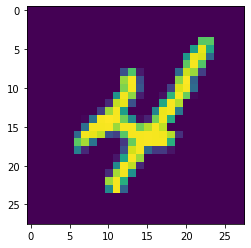

In [5]:
plt.imshow(X_train[9])

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
# one hot encoding
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [9]:
#scalling the training and test images between 0 - 1
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0].max(),X_train[0].min()

(1.0, 0.0)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
#reshaping with batch size, width, height, colour channels
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28,1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#ouputlayer softtmax --> multiclass
# 10 layers because your target is in shape of 10 
model.add(Dense(10,activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
earlystops = EarlyStopping(monitor='val_loss',patience=1)

In [31]:
X_train.shape, y_cat_train.shape, X_test.shape, y_cat_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [32]:
model.fit(x=X_train,y=y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),
          callbacks=[earlystops])

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2861 - accuracy: 0.9134 - val_loss: 0.0513 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0427 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0419 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0376 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0352 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0445 - val_accuracy: 0.9886


In [33]:
# model save
model.save('MNIST.h5')

In [34]:
model.history.history

{'loss': [0.13842153549194336,
  0.04870157316327095,
  0.03012964129447937,
  0.021157773211598396,
  0.01409530732780695,
  0.011027222499251366],
 'accuracy': [0.9583166837692261,
  0.9847666621208191,
  0.9907666444778442,
  0.9929500222206116,
  0.9953666925430298,
  0.9962833523750305],
 'val_loss': [0.05129716172814369,
  0.042670197784900665,
  0.041917793452739716,
  0.037613414227962494,
  0.03516574949026108,
  0.044504500925540924],
 'val_accuracy': [0.9842000007629395,
  0.9861999750137329,
  0.9865999817848206,
  0.9884999990463257,
  0.989799976348877,
  0.9886000156402588]}

In [35]:
losses[['accuracy','val_accuracy']].plot()

KeyError: "None of [Index(['accuracy', 'val_accuracy'], dtype='object')] are in the [columns]"

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
predict = model.predict_classes(X_test)

In [ ]:
# model evaluation
output = model.evaluate(X_test,y_cat_test, verbose=0)

print('Accuracy : {:.2f}%'.format((output[1])*100))
print('loss : {:.2f}%'.format((output[0])*100))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predict))

In [ ]:
confusion_matrix(y_test,predict)

In [ ]:
plt.imshow(X_test[0].reshape(28,28))

In [ ]:
# reshape <-- num of images, width, height, color channels
model.predict_classes(X_test[0].reshape(1,28,28,1))

In [ ]:
plt.imshow(X_test[7].reshape(28,28))

In [ ]:
# reshape <-- num of images, width, height, color channels
model.predict_classes(X_test[7].reshape(1,28,28,1))